**Aluna:** Ada Maris Pereira Mário - N° USP: 12725432

**Questão 1**

Bibliotecas que usaremos.

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

Inicialmente, fazemos a leitura e limpeza dos dados.

In [ ]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a#file-life_expectancy_data-csv"
# Read the table from the URL into a dataframe
df = pd.read_html(url)[0]

# Remove the first column
df = df.iloc[:, 1:]

# Display the modified dataframe
df.head(10)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
5,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.679367,66.0,...,66.0,9.20,66,0.1,553.328940,2883167,18.4,18.4,0.448,9.2
6,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.762217,63.0,...,63.0,9.42,63,0.1,445.893298,284331,18.6,18.7,0.434,8.9
7,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.873925,64.0,...,64.0,8.33,64,0.1,373.361116,2729431,18.8,18.9,0.433,8.7
8,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.910156,63.0,...,63.0,6.73,63,0.1,369.835796,26616792,19.0,19.1,0.415,8.4
9,Afghanistan,Asia,2006,Developing,57.3,295,84,0.03,17.171518,64.0,...,58.0,7.43,58,0.1,272.563770,2589345,19.2,19.3,0.405,8.1


In [ ]:
print(df.isnull().sum())

Country                              0
Continent                            0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        464
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                8
Total_expenditure                  152
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness 1-19 years                  0
thinness 5-9 years                   0
Income_composition_of_resources      3
Schooling                            3
dtype: int64


Vamos selecionar os nomes dos países.

In [ ]:
countries = np.unique(df['Country'])
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jo

Vamos criar uma série temporal que mostre a evolução da expectativa de vida na Irlanda, Finlândia, Países Baixos, Z|ambia e Angola.

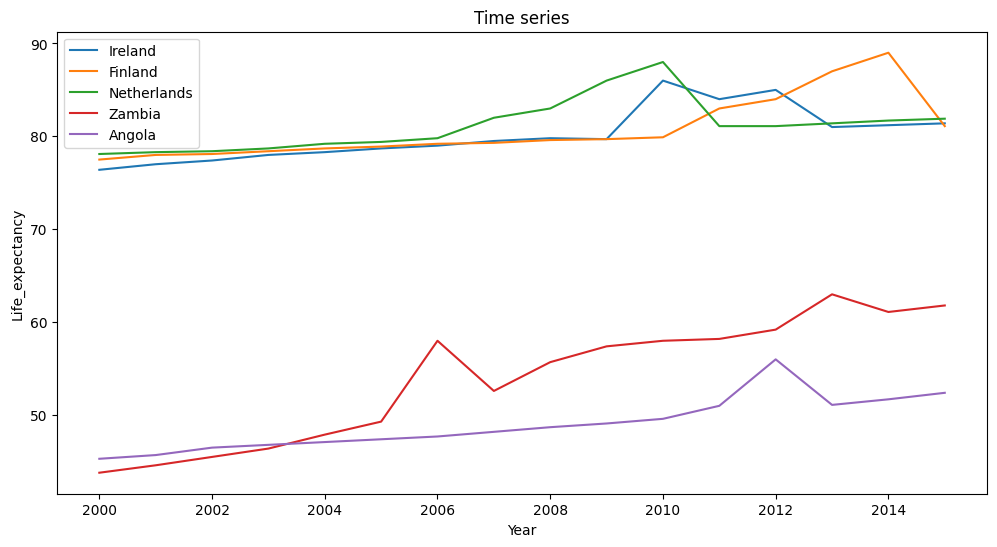

In [ ]:
selected_countries = ['Ireland', 'Finland', 'Netherlands', 'Zambia','Angola']
filtered_data = df[df["Country"].isin(selected_countries)]
variable = varnames[4]
plt.figure(figsize=(12, 6))
for c in selected_countries:
    country_data = filtered_data[filtered_data["Country"] == c]
    life_expectancy = country_data[variable]
    date = country_data['Year']
    plt.plot(date,life_expectancy, label = c)

plt.title("Time series")
plt.xlabel("Year")
plt.ylabel(variable)
plt.legend()
plt.show()

**Questão 2**

Vamos fazer um boxplot para Irlanda, Finlândia, Países Baixos, Zambia e Angola para verificarmos a escolaridade.

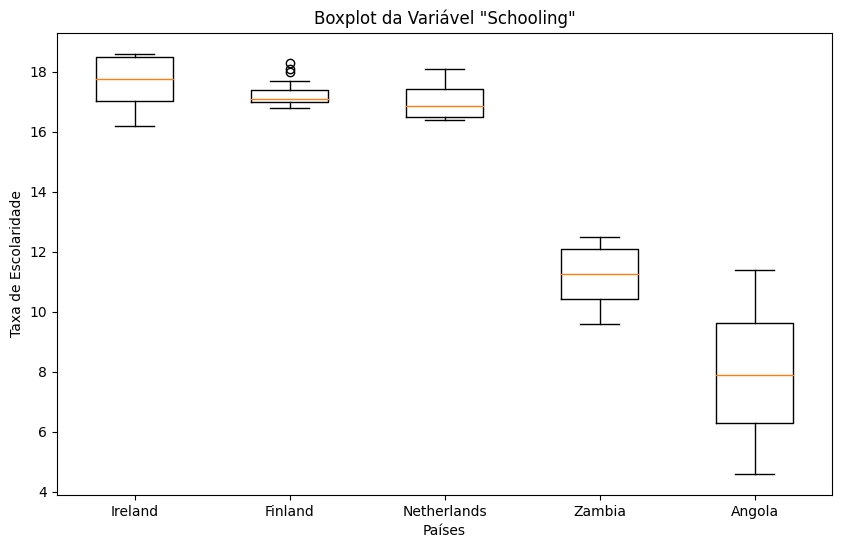

In [ ]:
filtered_data = df[df['Country'].isin(['Ireland', 'Finland', 'Netherlands', 'Zambia','Angola'])]

# Cria um boxplot para a variável "Schooling" em relação aos países selecionados
plt.figure(figsize=(10, 6))
plt.title('Boxplot da Variável "Schooling"')
plt.xlabel('Países')
plt.ylabel('Taxa de Escolaridade')
plt.boxplot([filtered_data[filtered_data['Country'] == 'Ireland']['Schooling'],
             filtered_data[filtered_data['Country'] == 'Finland']['Schooling'],
             filtered_data[filtered_data['Country'] == 'Netherlands']['Schooling'],
             filtered_data[filtered_data['Country'] == 'Zambia']['Schooling'],
             filtered_data[filtered_data['Country'] == 'Angola']['Schooling']],
            labels=['Ireland', 'Finland', 'Netherlands', 'Zambia','Angola'])
plt.show()

**Questão 3**

In [ ]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

# Read the table from the URL into a dataframe
df = pd.read_html(url)[0]

# Remove the first column
df = df.iloc[:, 1:]

# Display the modified dataframe
df.head(10)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
5,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.679367,66.0,...,66.0,9.20,66,0.1,553.328940,2883167,18.4,18.4,0.448,9.2
6,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.762217,63.0,...,63.0,9.42,63,0.1,445.893298,284331,18.6,18.7,0.434,8.9
7,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.873925,64.0,...,64.0,8.33,64,0.1,373.361116,2729431,18.8,18.9,0.433,8.7
8,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.910156,63.0,...,63.0,6.73,63,0.1,369.835796,26616792,19.0,19.1,0.415,8.4
9,Afghanistan,Asia,2006,Developing,57.3,295,84,0.03,17.171518,64.0,...,58.0,7.43,58,0.1,272.563770,2589345,19.2,19.3,0.405,8.1


Vamos fazer um gráfico de setores para a variável 'Status':

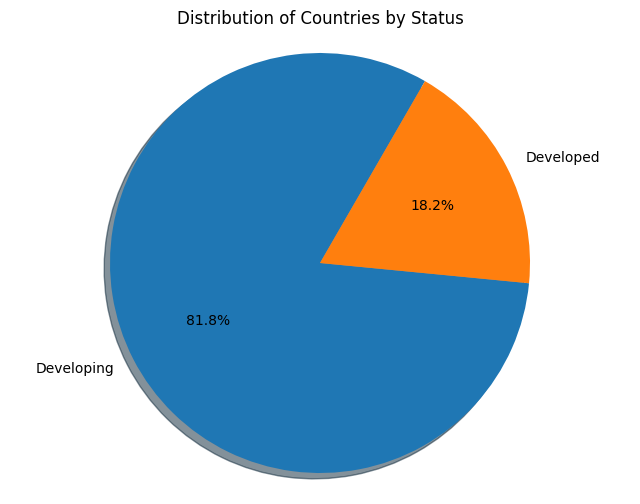

In [ ]:
# Count the occurrences of each status
status_counts = df['Status'].value_counts()

# Create a pie plot for the "Status" variable
plt.figure(figsize=(8, 6))
plt.title('Distribution of Countries by Status')
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Questão 4**

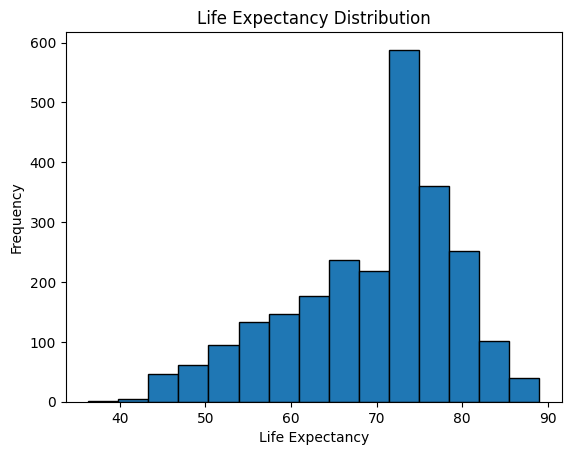

In [ ]:
# Create a histogram for the "Life_expectancy" variable
plt.hist(df['Life_expectancy'], bins=15, edgecolor='black')
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Life Expectancy Distribution")
plt.show()

In [ ]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,1997.000000,2461.000000,2461.000000,2461.000000,2453.000000,2309.000000,2461.000000,2461.000000,2461.000000,2461.000000,2458.000000,2458.000000
mean,2007.485169,69.464567,160.961804,31.134498,4.328952,880.115968,80.849775,2361.811865,38.346404,43.204388,82.682022,5.874010,1.893661,7555.989842,4.841040,4.883909,0.633627,12.157933
std,4.601993,9.639385,126.167514,127.249666,4.056351,2143.267664,24.975829,11148.748920,19.908022,172.992761,23.147657,2.395258,5.464583,14337.844932,4.500021,4.592501,0.212276,3.326975
min,2000.000000,36.300000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.400000,69.000000,0.000000,0.510000,24.733286,77.000000,0.000000,19.200000,0.000000,78.000000,4.230000,0.100000,462.486524,1.600000,1.600000,0.494250,10.200000
50%,2007.000000,72.300000,137.000000,2.000000,3.480000,122.936535,92.000000,15.000000,43.800000,3.000000,93.000000,5.760000,0.100000,1792.384500,3.300000,3.300000,0.686000,12.450000
75%,2011.000000,76.000000,223.000000,19.000000,7.380000,579.738437,96.000000,341.000000,56.100000,24.000000,97.000000,7.530000,0.800000,6171.262444,7.100000,7.100000,0.788000,14.500000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


**Questão 5**

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://www.worldometers.info/world-population/population-by-country/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the population data
table = soup.find('table', {'id': 'example2'})

# Convert the table to a pandas dataframe
df = pd.read_html(str(table))[0]

# Convert the 'Population' column to string
df[df.columns[2]] = df[df.columns[2]].astype(str)

# Convert the 'Population' column to numeric
df[df.columns[2]] = pd.to_numeric(df[df.columns[2]].str.replace(',', ''), errors='coerce')

# Remove the first column
df = df.iloc[:, 1:]

In [ ]:
df.head(10)

,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %
5,Nigeria,223804632,2.41 %,5263420,246,910770,-59996,5.1,17.0,54 %,2.78 %
6,Brazil,216422446,0.52 %,1108948,26,8358140,6000,1.6,34.0,88 %,2.69 %
7,Bangladesh,172954319,1.03 %,1767947,1329,130170,-309977,1.9,27.0,41 %,2.15 %
8,Russia,144444359,-0.19 %,-268955,9,16376870,-136414,1.5,39.0,75 %,1.80 %
9,Mexico,128455567,0.75 %,951442,66,1943950,-50239,1.8,30.0,88 %,1.60 %


In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Print the correlation matrix
print(corr)

                    Population  (2023)  Net  Change  Density  (P/Km²)  \
Population  (2023)            1.000000     0.621103         -0.025359   
Net  Change                   0.621103     1.000000         -0.032072   
Density  (P/Km²)             -0.025359    -0.032072          1.000000   
Land Area  (Km²)              0.451759     0.170999         -0.059129   
Migrants  (net)              -0.169378    -0.301581         -0.003888   
Fert.  Rate                  -0.035498     0.268418         -0.119682   
Med.  Age                    -0.009930    -0.284370          0.200981   

                    Land Area  (Km²)  Migrants  (net)  Fert.  Rate  Med.  Age  
Population  (2023)          0.451759        -0.169378    -0.035498  -0.009930  
Net  Change                 0.170999        -0.301581     0.268418  -0.284370  
Density  (P/Km²)           -0.059129        -0.003888    -0.119682   0.200981  
Land Area  (Km²)            1.000000         0.087914    -0.021915   0.020464  
Migrants  (net)

<ipython-input-45-559c6e9489ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
